In [1]:
!pip install tensorflow
!pip install keras



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os
import cv2
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import to_categorical
# Use tensorflow.keras.preprocessing for image manipulation
from tensorflow.keras.preprocessing.image import img_to_array


In [4]:
#from google.colab.patches import cv2_imshow
lst = ['Malignant','Beningn','no skin ']
# Disable scientific notation for clarity
np.set_printoptions(suppress=True)


In [5]:
#from google.colab.patches import cv2_imshow
lst = ['Malignant','Beningn','no skin ']
# Disable scientific notation for clarity
np.set_printoptions(suppress=True)


In [6]:
!pip install requests

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [8]:
base_path = os.path.expanduser('~/Downloads/app')  # This works for most systems
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')


train_datagen = ImageDataGenerator(rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,  # Random rotation
    width_shift_range=0.1,  # Horizontal shift
    height_shift_range=0.1,  # Vertical shift
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(train_path,
                                              target_size=(128, 128),
                                              batch_size=32,
                                              class_mode='binary')

test_data = test_datagen.flow_from_directory(test_path,
                                            target_size=(128, 128),
                                            batch_size=32,
                                            class_mode='binary')

Found 2637 images belonging to 2 classes.
Found 581 images belonging to 2 classes.


In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


# Initialize the Sequential model
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Block (Added)
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Dropout after Conv2D

# Fifth Convolutional Block (Added)
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))  # Dropout after Conv2D

# Flattening the output
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(256, activation='relu'))  # Increased Dense layer size
model.add(Dropout(0.5))  # Dropout for regularization

# Output Layer
model.add(Dense(1, activation='sigmoid'))  # For binary classification

C:\Users\Mithun\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_data,
          steps_per_epoch=train_data.samples // 32,
          epochs=10,
          validation_data=test_data,
          validation_steps=test_data.samples // 32)

Epoch 1/10


C:\Users\Mithun\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 39s 437ms/step - accuracy: 0.5510 - loss: 0.6774 - val_accuracy: 0.7153 - val_loss: 0.5692
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.6562 - loss: 0.5796 - val_accuracy: 1.0000 - val_loss: 0.4520
Epoch 3/10


C:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


82/82 ━━━━━━━━━━━━━━━━━━━━ 15s 175ms/step - accuracy: 0.7353 - loss: 0.5486 - val_accuracy: 0.8021 - val_loss: 0.4573
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.8125 - loss: 0.4529 - val_accuracy: 0.6000 - val_loss: 0.6104
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 24s 285ms/step - accuracy: 0.7695 - loss: 0.4637 - val_accuracy: 0.7778 - val_loss: 0.4333
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.7500 - loss: 0.4771 - val_accuracy: 1.0000 - val_loss: 0.1857
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 24s 279ms/step - accuracy: 0.7969 - loss: 0.4346 - val_accuracy: 0.8056 - val_loss: 0.4202
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.8438 - loss: 0.3131 - val_accuracy: 0.6000 - val_loss: 0.5719
Epoch 9/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 24s 285ms/step - accuracy: 0.7912 - loss: 0.4233 - val_accuracy: 0.8003 - val_loss: 0.4086
Epoch 10/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.7500 - loss: 0.4677 - val_accuracy: 0.4000 -

In [12]:
loss, accuracy = model.evaluate(test_data)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.8243 - loss: 0.3747
Test loss: 0.3997
Test accuracy: 0.8055


In [13]:
model.save('weights.h5')

In [14]:
from tensorflow.keras.models import load_model
model = load_model('weights.h5')
def preprocess_image(image_path):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(image_path, target_size=(128, 128))
    img = image.img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img
def predict_image(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)

    if prediction < 0.5:
        return 'benign'
    else:
        return 'malignant'



In [15]:
# Update the image_path to include the actual image file name
image_path = 'C:/Users/Mithun/Downloads/Screenshot 2024-09-29 145617.png'  # Replace '1.jpg' with your actual image file name

# Call the predict function
result = predict_image(image_path)

# Print the result
print(f'The image is a {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
The image is a malignant


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The image is a benign
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The image is a benign
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The image is a benign
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The image is a malignant
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The image is a benign
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The image is a benign
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The image is a benign
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The image is a malignant
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The image is a benign
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The image is a malignant
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The image is a benign
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
The image is a benign
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The image is a malignant
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The image is a benign
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The image is a benign
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The image is a malignant
1/1 ━━━━━━━━━━━━━━━━━━━━ 

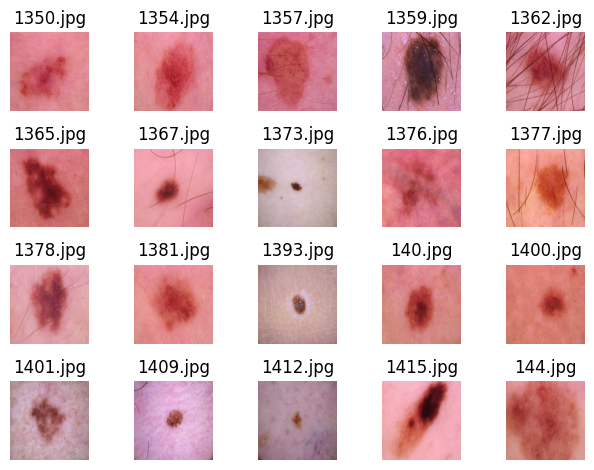

In [16]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Specify the path to your folder containing images
image_folder = 'C:/Users/Mithun/Downloads/app/test/benign'  # Adjust to your path

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Check the first 20 images
for i, image_file in enumerate(image_files[:20]):
    # Construct the full path to the image file
    image_path = os.path.join(image_folder, image_file)

    # Open the image using PIL
    img = Image.open(image_path)
    result = predict_image(image_path)

# Print the result
    print(f'The image is a {result}')

    # Display the image
    plt.subplot(4, 5, i + 1)  # Create a subplot for displaying images (4 rows, 5 columns)
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.title(image_file)  # Show the filename as title

# Adjust layout and show the images
plt.tight_layout()
plt.show()


In [17]:
pip install streamlit tensorflow Pillow


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.7 MB 3.2 MB/s eta 0:00:03
    --------------------------------------- 0.2/8.7 MB 2.5 MB/s eta 0:00:04
   - -------------------------------------- 0.4/8.7 MB 3.0 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/8.7 MB 3.4 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/8.7 MB 3.2 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/8.7 MB 3.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/8.7 MB 3.3 MB/s eta 0:00:03
   ----- ---------------------------------- 1.2/8.7 MB 3.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.2/8.7 MB 3.4 MB/s eta 0:00:03
   ------ --------------------------------- 1.5/8.7 MB 3.3 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.7 MB 3.4 MB/s eta 0:00:03
   -------- -----


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
